In [2]:
from matplotlib import pyplot as plt
from numpy import linalg as LA
import random
import numpy as np
import pandas as pd
import os
import cv2

In [3]:
def train_split(l,train_percent):
    random.seed(2019)
    random.shuffle(l)
    cut = int(len(l)*train_percent)
    return l[:cut],l[cut:]

In [4]:
data_path ="./../AVR_data/"
folder_path = os.listdir(data_path)
folder_path = [data_path+x for x in folder_path]
train_image_names = []
test_image_names = []

for path in folder_path:
    image_names = os.listdir(path)
    image_names = [path +"/"+x for x in image_names ]
    tra,tes = train_split(image_names,0.8)
    train_image_names=train_image_names + tra
    test_image_names=test_image_names +tes
    
# train_image_names


In [5]:
train_paths,test_paths  = train_image_names , test_image_names 
image_paths = train_paths

In [6]:
# images = []
# min_wid = 10000
# min_hei = 10000
# max_wid = 0
# max_hei = 0
# for i in image_paths:
#     img = cv2.imread(i,0)
#     if(min_wid>img.shape[0]):min_wid = img.shape[0]
#     if(min_hei>img.shape[1]):min_hei = img.shape[1]        
#     if(max_wid<img.shape[0]):max_wid = img.shape[0]
#     if(max_hei<img.shape[1]):max_hei = img.shape[1]        
# print(min_wid,min_hei)        
# print(max_wid,max_hei)        
# # plt.imshow(img)

In [7]:
all_images = []
for i in image_paths:
    img = cv2.imread(i,0)
    img = cv2.resize(img,(256,256),interpolation = cv2.INTER_CUBIC)
    all_images.append(img.reshape((256*256)))

In [8]:
all_images = np.array(all_images)

In [9]:
all_images.shape

(685, 65536)

In [10]:
mean_image = np.zeros(all_images.shape[1])
for i in range(0,all_images.shape[0]):
    mean_image += all_images[i]
mean_image = mean_image / (all_images.shape[0])    

In [11]:
mean_shifted_images = []
for i in range(0,all_images.shape[0]):
    mean_shifted_images.append(all_images[i] - mean_image)

mean_shifted_images = np.array(mean_shifted_images)
mean_shifted_images_transpose = mean_shifted_images.transpose()

In [28]:
Covariance_matrix = np.cov(mean_shifted_images)
Covariance_matrix.shape

(685, 685)

In [29]:
eigen_values, eigen_vectors = np.linalg.eig(Covariance_matrix)
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]
# eigen_values

In [14]:
eigen_space = np.matmul(mean_shifted_images_transpose,eigen_vectors)
eigen_space_transpose = eigen_space.transpose()

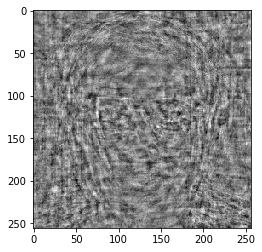

In [15]:
plt.imshow(eigen_space_transpose[650].reshape((256,256)),cmap="gray")

In [26]:
# np.dot(np.array(eigen_space_transpose[650]),np.array(eigen_space_transpose[0]))

-1.1278316378593445e-06